In [49]:
# Python code for Julia Fractal 
from PIL import Image 
   
# driver function 
if __name__ == "__main__": 
    
    # setting the width, height and zoom  
    # of the image to be created 
    w, h, zoom = 1920,1080,1
   
    # creating the new image in RGB mode 
    bitmap = Image.new("RGB", (w, h), "white") 
  
    # Allocating the storage for the image and 
    # loading the pixel data. 
    pix = bitmap.load() 
     
    # setting up the variables according to  
    # the equation to  create the fractal 
    cX, cY = -0.7, 0.27015
    moveX, moveY = 0.0, 0.0
    maxIter = 255
   
    for x in range(w): 
        for y in range(h): 
            zx = 1.5*(x - w/2)/(0.5*zoom*w) + moveX 
            zy = 1.0*(y - h/2)/(0.5*zoom*h) + moveY 
            i = maxIter 
            while zx*zx + zy*zy < 4 and i > 1: 
                tmp = zx*zx - zy*zy + cX 
                zy,zx = 2.0*zx*zy + cY, tmp 
                i -= 1
  
            # convert byte to RGB (3 bytes), kinda  
            # magic to get nice colors 
            pix[x,y] = (i << 21) + (i << 10) + i*8
  
    # to display the created fractal 
    bitmap.show()

In [33]:
"""Barnsley Fern fractal generation"""
import random
import array
from PIL import Image

class Barnsley:
    """Generate Barnsley like fractals using affine transforms"""
    def __init__(self, nr_points, coefficients="fern"):
        self.nr_points = nr_points

        #Initial (starting point)
        self.x = 0.0
        self.y = 0.0

        # Store the fractal points
        self.point_x = []
        self.point_y = []

        # Select the set of coefficients to use
        if coefficients == "fern":
            self.probability_factors = [0.01, 0.85, 0.07, 0.07]
            self.a = [0, 0.85, 0.20, -0.15]
            self.b = [0, 0.04, -0.26, 0.28]
            self.c = [0, -0.04, 0.23, 0.26]
            self.d = [0.16, 0.85, 0.22, 0.24]
            self.e = [0, 0, 0, 0]
            self.f = [0, 1.6, 1.6, 0.44]            
        elif coefficients == "tree":
            self.probability_factors = [0.05, 0.4, 0.4, 0.15]        
            self.a = [0.0, 0.42, 0.42, 0.1]
            self.b = [0.0, -0.42, 0.42, 0.0]
            self.c = [0.0, 0.42, -0.42, 0.0]
            self.d = [0.5, 0.42, 0.42, 0.1]
            self.e = [0.0, 0.0, 0.0, 0.0]
            self.f = [0.0, 0.2, 0.2, 0.2]
        elif coefficients == "sierpinsky":
            self.probability_factors = [0.33, 0.33, 0.34]        
            self.a = [0.5, 0.5, 0.5]
            self.b = [0.0, 0.0, 0.0]
            self.c = [0.0, 0.0, 0.0]
            self.d = [0.5, 0.5, 0.5]
            self.e = [1.0, 1.0, 50.0]
            self.f = [1.0, 50.0, 50.0]
        elif coefficients == "custom":
            self.probability_factors = [0.04, 0.8, 0.08, 0.08]
            self.a = [0, 0.7, 0.20, -0.2]
            self.b = [0, 0.035, -0.29, 0.28]
            self.c = [0, -0.04, 0.23, 0.26]
            self.d = [0.16, 0.8, 0.22, 0.25]
            self.e = [0, 0, 0, 0]
            self.f = [0, 1.6, 1.6, 0.44]


        self.nr_transforms = len(self.probability_factors)

        # Cumulative sum of the probabilty factors,
        # this defines the intervals corresponding to each transform
        self.cumulative_probabilities = [0] * (self.nr_transforms + 1)
        for i in range(1, len(self.cumulative_probabilities)):
            self.cumulative_probabilities[i] = self.cumulative_probabilities[i - 1] + \
                                               self.probability_factors[i - 1]

    def select_transform(self):
        """Randomly select an affine transform"""
        rnd = random.random()
        for i in range(self.nr_transforms):
            if self.cumulative_probabilities[i] <= rnd <= self.cumulative_probabilities[i + 1]:
                self.current_transform = i
                break

    def next_point(self):
        """Get the next point of the fractal"""
        self.select_transform()
        x_new = self.a[self.current_transform] * self.x + self.b[self.current_transform] * self.y + self.e[self.current_transform]
        y_new = self.c[self.current_transform] * self.x + self.d[self.current_transform] * self.y + self.f[self.current_transform]
        self.x = x_new
        self.y = y_new
        self.point_x.append(x_new)
        self.point_y.append(y_new)

    def generate_points(self):
        """Generate all the fractal points"""
        for _ in range(self.nr_points):
            self.next_point()

        # Bounding box for the fractal
        self.x_min = min(self.point_x)
        self.x_max = max(self.point_x)
        self.y_min = min(self.point_y)
        self.y_max = max(self.point_y)


def main():
    """Generate and the save as a PNG image a Barnsley Fern"""

    # Initialize the fractal data
    nr_points = 100000
    fern = Barnsley(nr_points)
    fern.generate_points()

    # Define the image size and scale factor for the fractal data
    width, height = 500, 500
    scale = min([height/(fern.y_max - fern.y_min), width/(fern.x_max - fern.x_min)]) * 0.9

    # Initialize an array that will store the image pixel data
    image_data = array.array('B', [255, 255, 255] * width * height)

    # For every point of the fractal data, transform the point in the image space
    # and fill the pixel color
    for i in range(nr_points):
        x = int((fern.point_x[i] - fern.x_min) * scale) + int((width - (fern.x_max - fern.x_min) * scale)/2)
        y = -int((fern.point_y[i] - fern.y_min) * scale) - int((height - (fern.y_max - fern.y_min) * scale)/2)

        index = 3 * (y * width + x)
        image_data[index] = 0
        image_data[index + 1] = 255
        image_data[index + 2] = 0

    # Show and save the image
    img = Image.frombytes("RGB", (width, height), image_data.tobytes())
    img.show("Barnsley's Fern")
    img.save("barnsley_fern.png")

if __name__ == "__main__":
    # execute only if run as a script
    main()

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


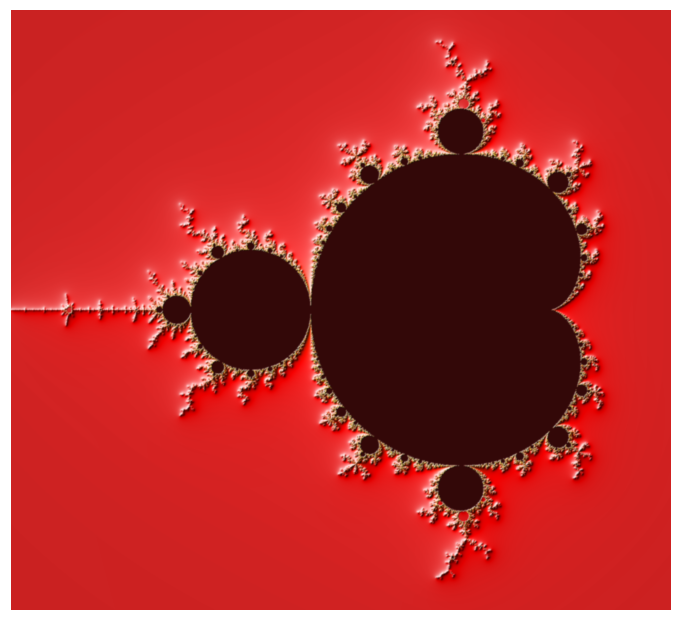

In [45]:
import numpy as np


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)
    C = X + Y[:, None]*1j
    N = np.zeros(C.shape, dtype=int)
    Z = np.zeros(C.shape, np.complex64)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2, +0.75, 3000/2
    ymin, ymax, yn = -1.25, +1.25, 2500/2
    maxiter = 500
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # Normalized recount as explained in:
    # https://linas.org/art-gallery/escape/smooth.html
    # https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift

    # This line will generate warnings for null values but it is faster to
    # process them afterwards using the nan_to_num
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 -
                          np.log(np.log(abs(Z)))/np.log(2) +
                          log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

In [79]:
def mandelbrot(xrng, yrng, escape=2, maxiter=50, cmap='magma'):
    ''' Generate Mandelbrot set. 
    
        Parameters
        ----------
        xrng: array of real values defining width of plot
        yrng: array of imag values defining height of plot
        escape: escape threshold
        maxiter: maximum number of iterations before giving up
        cmap: name of matplotlib colormap
        
        The image size in pixels will be len(xrng) x len(yrng).
    '''
    z0 = xrng + 1.0j * yrng.reshape(-1, 1)
    z = np.zeros(z0.shape, dtype='complex')    
    image = np.zeros((len(xrng), len(yrng)), dtype='int')  # The image data, how long each point takes to escape
    mask = np.full(image.shape, True)   # True/False mask indicating whether each pixel has escaped yet
    
    for i in range(maxiter):
        # Calculate the Mandelbrot recurrence function, but only points that haven't escaped yet.
        z[mask] = z[mask]**2 + z0[mask]
        mask = abs(z) < escape  # Find points that still haven't escaped
        image += mask           # And increase the iters of those points

    # Plot it.
    plt.figure(figsize=(8,8))
    plt.imshow(image, aspect='equal', cmap=cmap, origin='lower',
               extent=(xrng[0], xrng[-1], yrng[0], yrng[-1]))
    return image

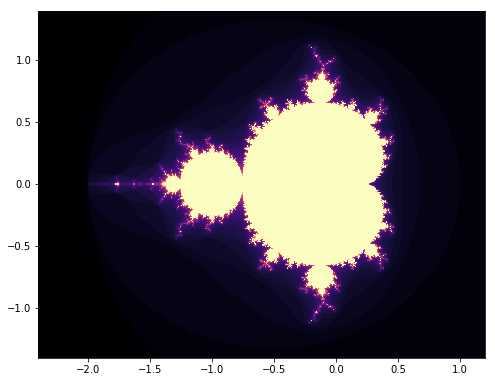

In [80]:
image = mandelbrot(xrng=np.linspace(-2.4,1.2,1000), yrng=np.linspace(-1.4,1.4,1000), maxiter=50)

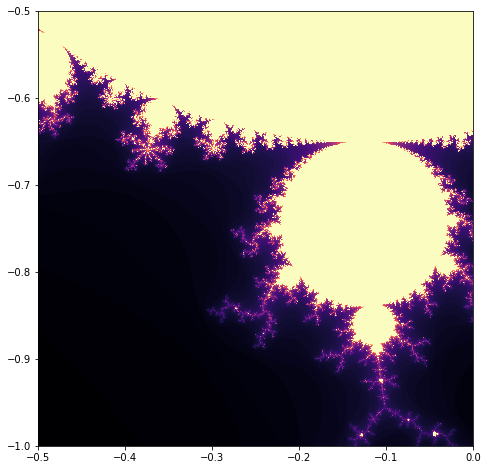

In [81]:
image = mandelbrot(xrng=np.linspace(-0.5,0,1000), yrng=np.linspace(-1.0,-0.5,1000), maxiter=100)

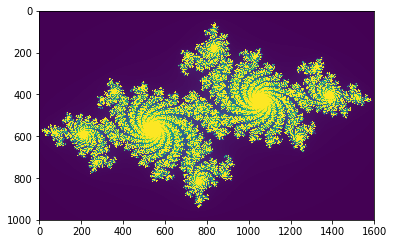

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def julia_set(width, height, zoom=1, niter=256):
    """ A julia set of geometry (width x height) and iterations 'niter' """

    w,h = width, height
    # Why (hxw) ? Because numpy creates a matrix as row x column
    # and height represents the y co-ordinate or rows and
    # width represents the x co-ordinate or columns.
    pixels = np.arange(w*h, dtype=np.uint16).reshape(h, w)
    pixels = np.arange(w*h, dtype=np.uint16).reshape(h, w)

    # The constant "c"
    # This determines the shape of the Julia set.
    c_real, c_imag = -0.7, 0.27
    
    for x in range(w): 
        for y in range(h):
            # calculate the initial real and imaginary part of z,
            # based on the pixel location and zoom and position values
            zx = 1.5*(x - w/2)/(0.5*zoom*w) 
            zy = 1.0*(y - h/2)/(0.5*zoom*h)

            for i in range(niter):
                radius_sqr = zx*zx + zy*zy
                # Iterate till the point is outside
                # the circle with radius 2.
                if radius_sqr > 4: break
                # Calculate new positions
                zy,zx = 2.0*zx*zy + c_imag, zx*zx - zy*zy + c_real

            color = (i >> 21) + (i >> 10)  + i*8
            pixels[y,x] = color
  
    # display the created fractal 
    plt.imshow(pixels)
    plt.show()  

julia_set(1600, 1000)

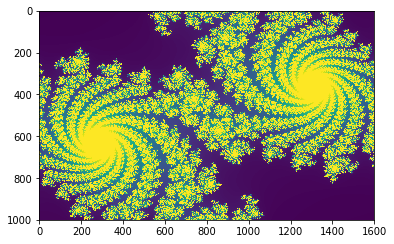

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def julia_set(width, height, zoom=1, niter=256):
    """ A julia set of geometry (width x height) and iterations 'niter' """

    w,h = width, height
    # Why (hxw) ? Because numpy creates a matrix as row x column
    # and height represents the y co-ordinate or rows and
    # width represents the x co-ordinate or columns.
    pixels = np.arange(w*h, dtype=np.uint16).reshape(h, w)
    pixels = np.arange(w*h, dtype=np.uint16).reshape(h, w)

    # The constant "c"
    # This determines the shape of the Julia set.
    c_real, c_imag = -0.7, 0.27
    
    for x in range(w): 
        for y in range(h):
            # calculate the initial real and imaginary part of z,
            # based on the pixel location and zoom and position values
            zx = 1.5*(x - w/2)/(0.5*zoom*w) 
            zy = 1.0*(y - h/2)/(0.5*zoom*h)

            for i in range(niter):
                radius_sqr = zx*zx + zy*zy
                # Iterate till the point is outside
                # the circle with radius 2.
                if radius_sqr > 4: break
                # Calculate new positions
                zy,zx = 2.0*zx*zy + c_imag, zx*zx - zy*zy + c_real

            color = (i >> 21) + (i >> 10)  + i*8
            pixels[y,x] = color
  
    # display the created fractal 
    plt.imshow(pixels)
    plt.show()  

julia_set(1600, 1000, zoom=2)

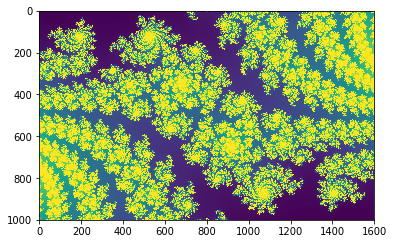

In [58]:
import matplotlib.pyplot as plt
import numpy as np

def julia_set(width, height, zoom=1, niter=256):
    """ A julia set of geometry (width x height) and iterations 'niter' """

    w,h = width, height
    # Why (hxw) ? Because numpy creates a matrix as row x column
    # and height represents the y co-ordinate or rows and
    # width represents the x co-ordinate or columns.
    pixels = np.arange(w*h, dtype=np.uint16).reshape(h, w)
    pixels = np.arange(w*h, dtype=np.uint16).reshape(h, w)

    # The constant "c"
    # This determines the shape of the Julia set.
    c_real, c_imag = -0.7, 0.27
    
    for x in range(w): 
        for y in range(h):
            # calculate the initial real and imaginary part of z,
            # based on the pixel location and zoom and position values
            zx = 1.5*(x - w/2)/(0.5*zoom*w) 
            zy = 1.0*(y - h/2)/(0.5*zoom*h)

            for i in range(niter):
                radius_sqr = zx*zx + zy*zy
                # Iterate till the point is outside
                # the circle with radius 2.
                if radius_sqr > 4: break
                # Calculate new positions
                zy,zx = 2.0*zx*zy + c_imag, zx*zx - zy*zy + c_real

            color = (i >> 21) + (i >> 10)  + i*8
            pixels[y,x] = color
  
    # display the created fractal 
    plt.imshow(pixels)
    plt.show()  

julia_set(1600, 1000, zoom=4)

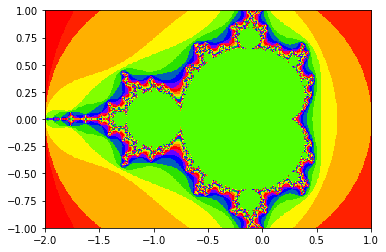

In [62]:
import matplotlib.pyplot as plt
import numpy as np
 
npts = 300
max_iter = 100
 
X = np.linspace(-2, 1, 2 * npts)
Y = np.linspace(-1, 1, npts)
 
#broadcast X to a square array
C = X[:, None] + 1J * Y
#initial value is always zero
Z = np.zeros_like(C)
 
exit_times = max_iter * np.ones(C.shape, np.int32)
mask = exit_times > 0
 
for k in range(max_iter):
    Z[mask] = Z[mask] * Z[mask] + C[mask]
    mask, old_mask = abs(Z) < 2, mask
    #use XOR to detect the area which has changed 
    exit_times[mask ^ old_mask] = k
 
plt.imshow(exit_times.T,
           cmap=plt.cm.prism,
           extent=(X.min(), X.max(), Y.min(), Y.max()))

In [74]:
def mandelbrottrapcolor(xrng, yrng, trapwidth=.4, colors=None):
    ''' Generate Mandelbrot using axis orbit trap colored by iteration. 
    
        Parameters
        ----------
        xrng: array of real values defining width of plot
        yrng: array of imag values defining height of plot
        trapwidth: width of trap about real axis
        colors: list of (r,g,b) tuples, one for each iteration.
    '''
    if colors is None:
        # Colors as used by imshow are (r,g,b) tuples with each value in the range 0-1.
        colors = [(1,0,0), (0,1,0), (1,0,1), (1,1,0), (0,1,1), (0,0,1)]
        
    z0 = xrng + 1.0j * yrng.reshape(-1, 1)
    z = np.zeros(z0.shape, dtype='complex')    
    
    # This time, image is full RGB data instead of just a single value for lookup table.
    # Make an M x N x 3 array
    image = np.zeros((len(xrng), len(yrng), 3))  
    
    # Loop through the different colors each iteration.
    # Points trapped during each iteration will have their own color table, faded to black.
    for r,g,b in colors:
        z = z**2 + z0

        # Find points that are within trapwidth of imaginary axis
        mask = (abs(z.real) < trapwidth/2)
        
        # Use the distance from trap center to darken the color. Points on the axis
        # will be full color value, points at trapwidth/2 will be reduced to (0, 0, 0) black.
        distance = 1-abs(z[mask].real) / trapwidth*2  # Normalized distance from edge of trap
        image[mask,:] = np.array([r*distance, g*distance, b*distance]).transpose()
        
    plt.figure(figsize=(8,8))
    plt.imshow(image, aspect='equal', origin='lower',
               extent=(xrng[0], xrng[-1], yrng[0], yrng[-1]))
    return image

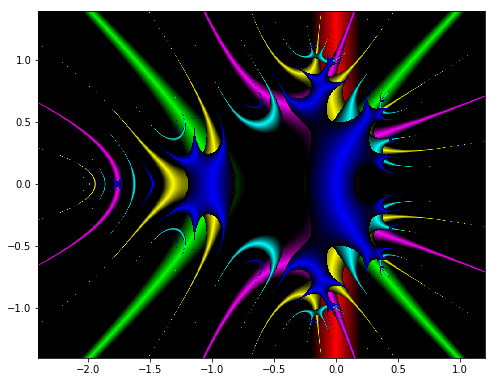

In [75]:
image = mandelbrottrapcolor(np.linspace(-2.4,1.2,1000), np.linspace(-1.4,1.4,1000))

In [77]:
def mandelbrottrap(xrng, yrng, trapwidth=.2, maxiter=10, cmap='Blues_r'):
    ''' Generate Mandelbrot set. 
    
        Parameters
        ----------
        xrng: array of real values defining width of plot
        yrng: array of imag values defining height of plot
        trapwidth: width of trap about real axis
        maxiter: maximum number of iterations before giving up
        cmap: name of matplotlib colormap
    '''
    z0 = xrng + 1.0j * yrng.reshape(-1, 1)
    z = np.zeros(z0.shape, dtype='complex')    
    image = np.zeros((len(xrng), len(yrng)))
    
    for i in range(maxiter):
        # Because traps can get hit multiple times, calculate all points every iteration (no masking).
        z = z**2 + z0
        # Find points that are within trapwidth of imaginary axis
        mask = (abs(z.real) < trapwidth/2)
        # Fill in the image with the distance from axis
        image[mask] = trapwidth/2 - abs(z[mask].real)
            
    plt.figure(figsize=(8,8))
    plt.imshow(image/trapwidth*2, aspect='equal', cmap=cmap, origin='lower',
               extent=(xrng[0], xrng[-1], yrng[0], yrng[-1]))
    return image

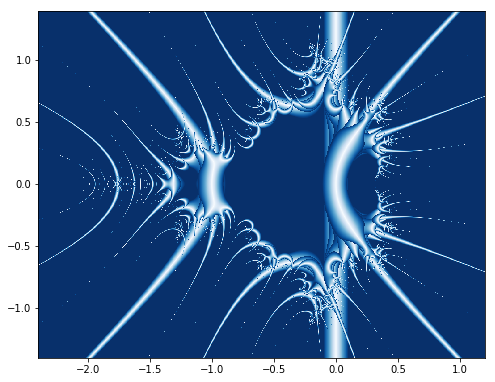

In [78]:
image = mandelbrottrap(np.linspace(-2.4,1.2,1000), np.linspace(-1.4,1.4,1000), maxiter=10)

In [91]:
import turtle
import math
import random
wn = turtle.Screen()
wn.bgcolor('black')
Albert = turtle.Turtle()
Albert.speed(0)
Albert.color('white')
rotate=int(360)
def drawCircles(t,size):
    for i in range(10):
        t.circle(size)
        size=size-4
def drawSpecial(t,size,repeat):
  for i in range (repeat):
    drawCircles(t,size)
    t.right(360/repeat)
drawSpecial(Albert,100,10)
Steve = turtle.Turtle()
Steve.speed(0)
Steve.color('yellow')
rotate=int(90)
def drawCircles(t,size):
    for i in range(4):
        t.circle(size)
        size=size-10
def drawSpecial(t,size,repeat):
    for i in range (repeat):
        drawCircles(t,size)
        t.right(360/repeat)
drawSpecial(Steve,100,10)
Barry = turtle.Turtle()
Barry.speed(0)
Barry.color('blue')
rotate=int(80)
def drawCircles(t,size):
    for i in range(4):
        t.circle(size)
        size=size-5
def drawSpecial(t,size,repeat):
    for i in range (repeat):
        drawCircles(t,size)
        t.right(360/repeat)
drawSpecial(Barry,100,10)
Terry = turtle.Turtle()
Terry.speed(0)
Terry.color('orange')
rotate=int(90)
def drawCircles(t,size):
    for i in range(4):
        t.circle(size)
        size=size-19
def drawSpecial(t,size,repeat):
    for i in range (repeat):
        drawCircles(t,size)
        t.right(360/repeat)
drawSpecial(Terry,100,10)
Will = turtle.Turtle()
Will.speed(0)
Will.color('pink')
rotate=int(90)
def drawCircles(t,size):
    for i in range(4):
        t.circle(size)
        size=size-20
def drawSpecial(t,size,repeat):
    for i in range (repeat):
        drawCircles(t,size)
        t.right(360/repeat)
drawSpecial(Will,100,10)